In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [13]:
dataPath = '../preprocess_train_dataset/pre06_train.csv'

df_spaceship = pd.read_csv(dataPath)

df_spaceship.shape

(8693, 24)

In [14]:
df_spaceship

,CryoSleep,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,...,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,spending_Categ_Low,spending_Categ_Medium,spending_Categ_High,Transported
0,False,False,True,False,False,True,False,False,False,False,...,39.0,0.0,0.0,0.0,0.0,0.0,True,False,False,False
1,False,True,False,False,False,False,False,False,False,True,...,24.0,109.0,9.0,25.0,549.0,44.0,False,True,False,True
2,False,False,True,False,True,False,False,False,False,False,...,58.0,43.0,3576.0,0.0,6715.0,49.0,False,False,True,False
3,False,False,True,False,True,False,False,False,False,False,...,33.0,0.0,1283.0,371.0,3329.0,193.0,False,False,True,False
4,False,True,False,False,False,False,False,False,False,True,...,16.0,303.0,70.0,151.0,565.0,2.0,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,False,True,False,True,False,False,False,False,False,...,41.0,0.0,6819.0,0.0,1643.0,74.0,False,False,True,False
8689,True,True,False,False,False,False,False,False,False,False,...,18.0,0.0,0.0,0.0,0.0,0.0,True,False,False,False
8690,False,True,False,False,False,False,False,False,False,False,...,26.0,0.0,0.0,1872.0,1.0,0.0,False,True,False,True
8691,False,False,True,False,False,False,False,False,True,False,...,32.0,0.0,1049.0,0.0,353.0,3235.0,False,False,True,False


In [15]:
df_spaceship.dtypes

CryoSleep                   bool
HomePlanet_Earth            bool
HomePlanet_Europa           bool
HomePlanet_Mars             bool
Cabin_deck_A                bool
Cabin_deck_B                bool
Cabin_deck_C                bool
Cabin_deck_D                bool
Cabin_deck_E                bool
Cabin_deck_F                bool
Cabin_deck_G                bool
Cabin_deck_T                bool
Cabin_side_P                bool
Cabin_side_S                bool
Age                      float64
RoomService              float64
FoodCourt                float64
ShoppingMall             float64
Spa                      float64
VRDeck                   float64
spending_Categ_Low          bool
spending_Categ_Medium       bool
spending_Categ_High         bool
Transported                 bool
dtype: object

In [16]:
train_x, train_y = df_spaceship.drop(columns=['Transported']), df_spaceship['Transported']

In [17]:
# drop categorical data, remain the one hot encoded ones 

#train_x.drop(['PassengerId', 'HomePlanet', 'Cabin_deck', 'Cabin_side', 'Destination', 'First_Name', 'First_Name_le', 'Last_Name'], axis=1, inplace=True)

In [18]:
train_x

,CryoSleep,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Cabin_deck_A,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,...,Cabin_side_S,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,spending_Categ_Low,spending_Categ_Medium,spending_Categ_High
0,False,False,True,False,False,True,False,False,False,False,...,False,39.0,0.0,0.0,0.0,0.0,0.0,True,False,False
1,False,True,False,False,False,False,False,False,False,True,...,True,24.0,109.0,9.0,25.0,549.0,44.0,False,True,False
2,False,False,True,False,True,False,False,False,False,False,...,True,58.0,43.0,3576.0,0.0,6715.0,49.0,False,False,True
3,False,False,True,False,True,False,False,False,False,False,...,True,33.0,0.0,1283.0,371.0,3329.0,193.0,False,False,True
4,False,True,False,False,False,False,False,False,False,True,...,True,16.0,303.0,70.0,151.0,565.0,2.0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,False,True,False,True,False,False,False,False,False,...,False,41.0,0.0,6819.0,0.0,1643.0,74.0,False,False,True
8689,True,True,False,False,False,False,False,False,False,False,...,True,18.0,0.0,0.0,0.0,0.0,0.0,True,False,False
8690,False,True,False,False,False,False,False,False,False,False,...,True,26.0,0.0,0.0,1872.0,1.0,0.0,False,True,False
8691,False,False,True,False,False,False,False,False,True,False,...,True,32.0,0.0,1049.0,0.0,353.0,3235.0,False,False,True


In [19]:
train_y

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8693, dtype: bool

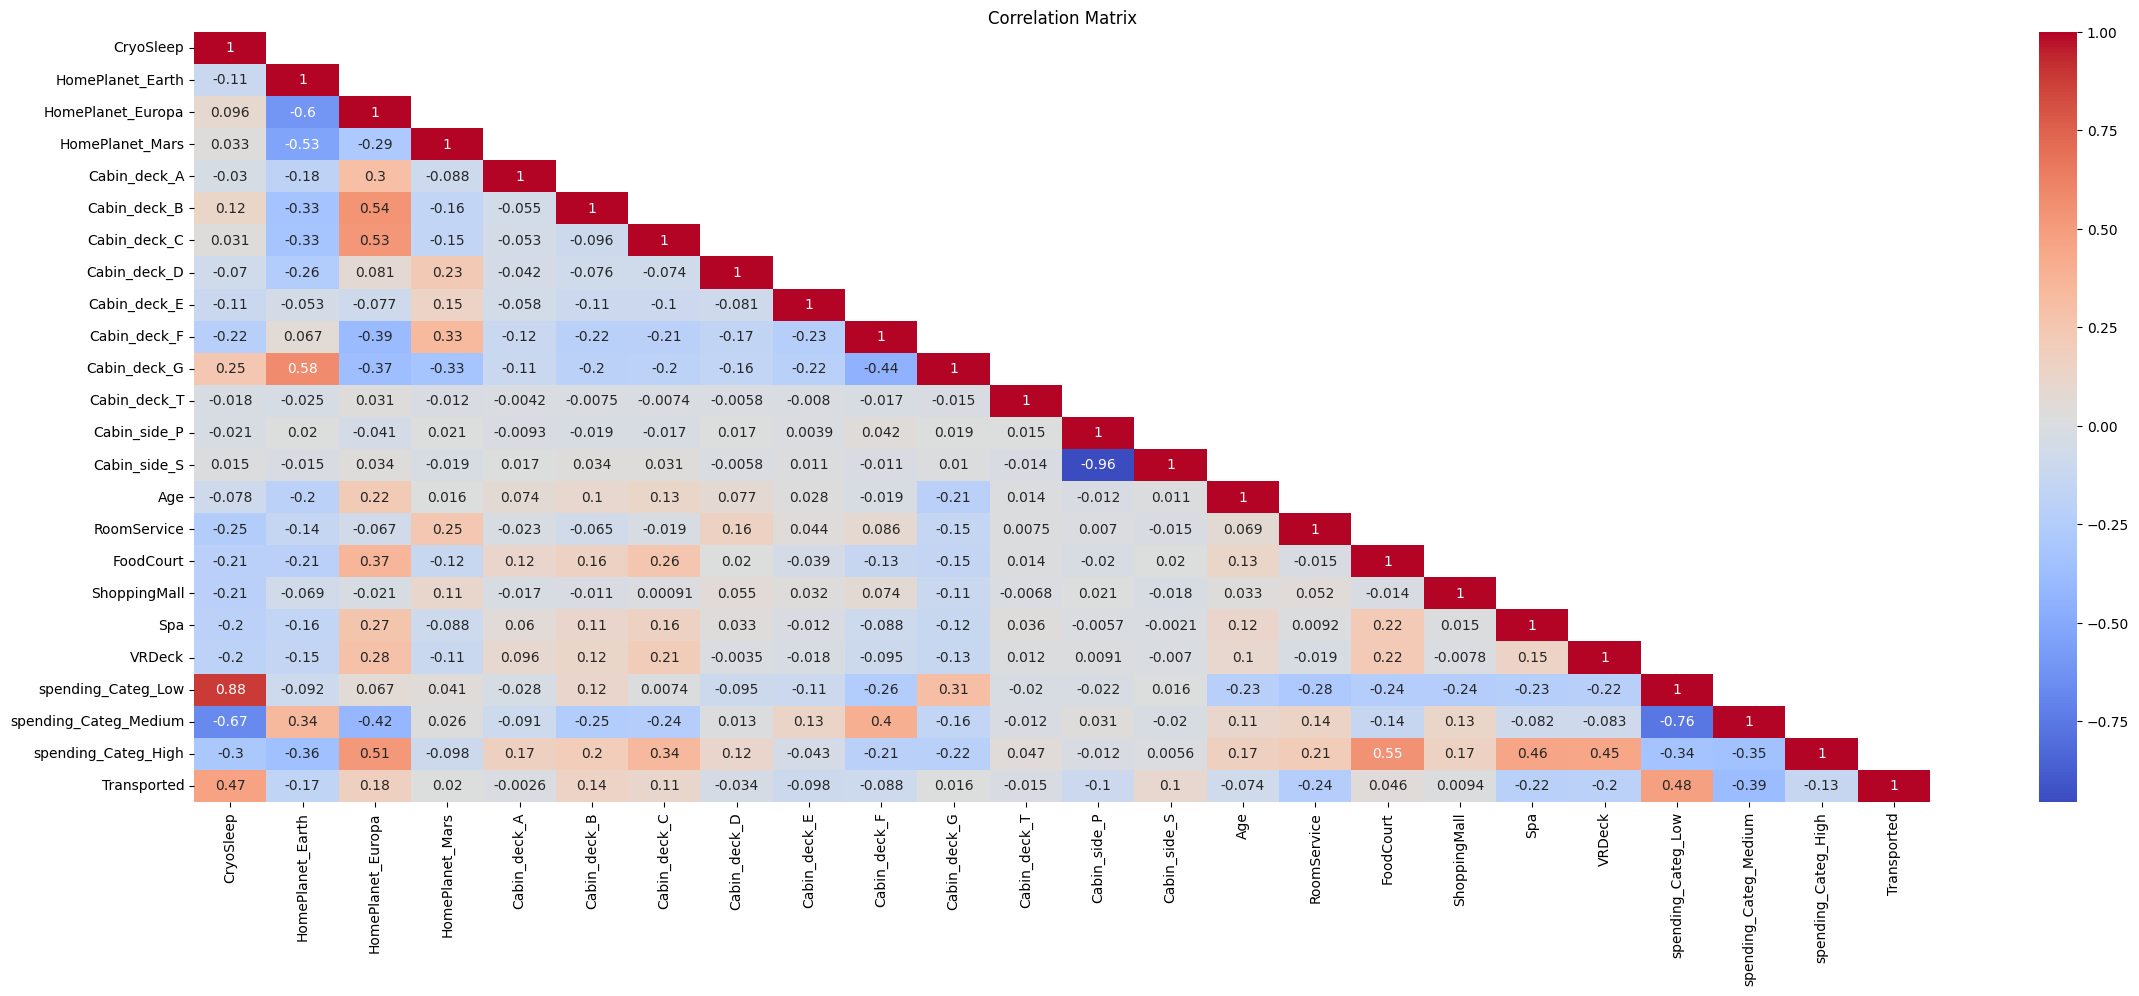

{'spending_Categ_Low', 'HomePlanet_Earth', 'HomePlanet_Europa', 'Spa', 'Cabin_deck_C', 'Cabin_deck_B', 'RoomService', 'Cabin_side_P', 'VRDeck', 'CryoSleep', 'spending_Categ_High', 'Transported', 'spending_Categ_Medium'}


In [20]:
dataframe = pd.DataFrame(pd.concat([train_x, train_y], axis=1))

# Compute correlation matrix
correlation_matrix = dataframe.corr()

# Visualize correlation matrix
plt.figure(figsize=(28, 10))

# Getting the Upper Triangle of the correlation matrix as mask
triu = np.triu(correlation_matrix, k=1)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", mask=triu)
plt.title("Correlation Matrix")
plt.show()

#  Remove features with low correlation to the output
output_correlation_threshold = 0.1  # low correlation threshold 
low_correlation_features = correlation_matrix[abs(correlation_matrix["Transported"]) < output_correlation_threshold].index
dataframe.drop(columns=low_correlation_features, inplace=True)

#  Remove highly correlated features
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:  # high correlation threshold 
            feature_i = correlation_matrix.columns[i]
            feature_j = correlation_matrix.columns[j]
            highly_correlated_features.add(feature_i)  # Remove feature_i

highly_correlated_features = highly_correlated_features & set(dataframe.columns)
dataframe.drop(columns=highly_correlated_features, inplace=True)

# Display the dropped unwanted features
print(set(dataframe.columns))

In [21]:
output_path = '../preprocess_train_dataset/'
dataframe.to_csv(output_path+'correlation.csv', index=False)